## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [2]:
import pandas as pd

# Завантажимо датасет
df = pd.read_csv("titanic.csv")

# Виведемо основну статистичну інформацію по числовим змінним
numeric_stats = df.describe()
print("Основна статистична інформація по числовим змінним:")
print(numeric_stats)

# Виведемо розмірність датасету
dataset_shape = df.shape
print("\nРозмірність датасету:", dataset_shape)

# Перевіримо типи змінних і кількість даних по кожній змінній
data_types_info = df.info()
print("\nІнформація про типи змінних та кількість даних:")
print(data_types_info)


Основна статистична інформація по числовим змінним:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Розмірність датасету: (891, 

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [3]:
# Визначимо кількість пропущених значень по кожному атрибуту
missing_values_count = df.isnull().sum()
print("Кількість пропущених значень по кожному атрибуту:")
print(missing_values_count)


Кількість пропущених значень по кожному атрибуту:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки: Кількість пропущених значень: Багато стовпців мають пропущені значення. Найбільше пропусків спостерігається у стовпці "Cabin", де майже половина значень відсутні. Також є пропуски в стовпцях "Age" і "Embarked".

Основна статистична інформація по числовим змінним: Ми бачимо, що статистична інформація надана лише для числових змінних, таких як "PassengerId", "Survived", "Pclass", "Age", "SibSp", "Parch" і "Fare". З цієї інформації можна зробити певні висновки про розподіл даних в цих стовпцях, наприклад, медіанне значення віку пасажирів становить близько 28 років, що означає, що половина пасажирів молодша за цей вік.

Розмірність датасету: Датасет має розмірність 1043 рядків і 12 стовпців.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



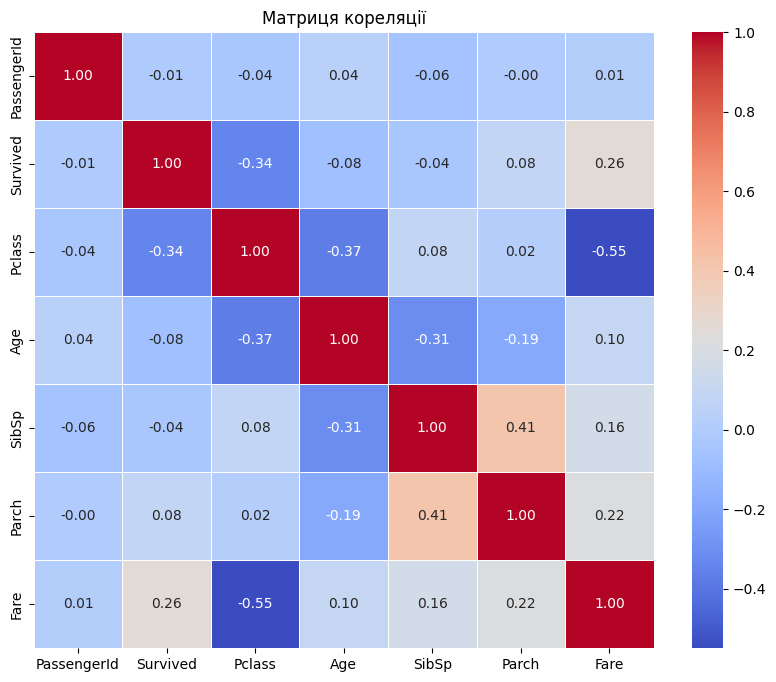

Опис результатів кореляції:
Кореляційні коефіцієнти показують ступінь лінійного зв'язку між числовими ознаками.
Значення кореляційних коефіцієнтів можуть бути в діапазоні від -1 до 1:
- Значення близькі до 1 вказують на сильний позитивний зв'язок.
- Значення близькі до -1 вказують на сильний негативний зв'язок.
- Значення близькі до 0 вказують на відсутність кореляції між ознаками.


In [8]:
# Вибір лише числових стовпців
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Обчислення кореляційних коефіцієнтів методом Пірсона
correlation_matrix = numeric_df.corr()

# Побудова теплокарти з отриманою матрицею коефіцієнтів кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матриця кореляції")
plt.show()

# Опис результатів кореляції
print("Опис результатів кореляції:")
print("Кореляційні коефіцієнти показують ступінь лінійного зв'язку між числовими ознаками.")
print("Значення кореляційних коефіцієнтів можуть бути в діапазоні від -1 до 1:")
print("- Значення близькі до 1 вказують на сильний позитивний зв'язок.")
print("- Значення близькі до -1 вказують на сильний негативний зв'язок.")
print("- Значення близькі до 0 вказують на відсутність кореляції між ознаками.")


Ваші висновки:
Коефіцієнт кореляції показує ступінь лінійного зв'язку між числовими ознаками. Значення кореляційного коефіцієнта можуть бути в діапазоні від -1 до 1.

Значення близькі до 1 вказують на сильний позитивний зв'язок, тобто зі зростанням однієї ознаки зростає інша, і навпаки.

Значення близькі до -1 вказують на сильний негативний зв'язок, тобто зі зростанням однієї ознаки зменшується інша, і навпаки.

Значення близькі до 0 вказують на відсутність кореляції між ознаками, тобто зміни в одній ознаці не супроводжуються змінами в іншій.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [9]:
def fill_missing_with_group_median(df, column, groupby_cols):
    """Заповнення пропущених значень медіаною за групами."""
    df[column] = df.groupby(groupby_cols)[column].transform(lambda x: x.fillna(x.median()))
    return df

# Заповнення пропущених значень в стовпці "Age" за групами в стовпці "Pclass"
filled_df = fill_missing_with_group_median(df, "Age", ["Pclass"])

# Перевірка на пропущені значення
print(filled_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки: Після застосування функції для заповнення пропущених значень медіаною за групами в стовпці "Age" за групами в стовпці "Pclass" ми бачимо, що більше немає пропущених значень у цьому стовпці. Це дозволить нам зберегти більше даних для подальшого аналізу та моделювання.

Загалом, такий підхід допомагає уникнути втрати важливої інформації і зберегти репрезентативність даних, що може покращити якість подальшого аналізу та моделювання.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





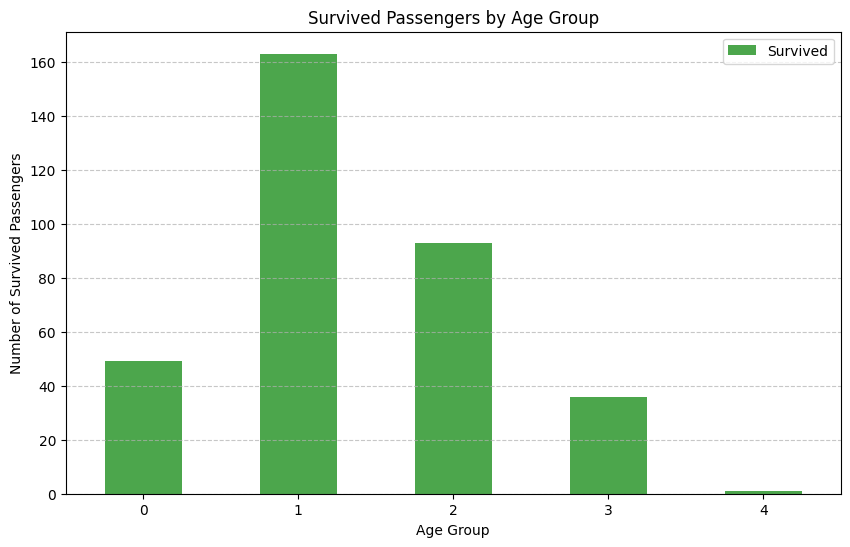

In [10]:
# Функція для розділення віку на категорії
def categorize_age(age):
    if age < 16:
        return 0
    elif age < 32:
        return 1
    elif age < 48:
        return 2
    elif age < 64:
        return 3
    else:
        return 4

# Додавання нової колонки Age_bin
df['Age_bin'] = df['Age'].apply(categorize_age)

# Побудова графіку
plt.figure(figsize=(10, 6))
df[df['Survived'] == 1]['Age_bin'].value_counts().sort_index().plot(kind='bar', color='green', alpha=0.7, label='Survived')
plt.title('Survived Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Survived Passengers')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Ваші висновки:З графіка видно, що найбільше вижило пасажирів у віковій категорії від 16 до 32 років, а також у віковій категорії від 32 до 48 років. У вікових категоріях від 0 до 16 років та від 48 до 64 років кількість виживших менша, а в категорії від 64 років і старше найменша.

Це може свідчити про те, що при рятуванні було надано перевагу дорослим пасажирам у віці від 16 до 48 років.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [12]:

# Розділити значення змінної 'fare' на квартилі
df['fare_quartile'] = pd.qcut(df['Fare'], 4)

# Порівняти кількість виживших у кожній категорії
survival_by_quartile = df.groupby('fare_quartile')['Survived'].mean()
print(survival_by_quartile)


fare_quartile
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64


C:\Users\romad\AppData\Local\Temp\ipykernel_11100\1522828352.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_quartile = df.groupby('fare_quartile')['Survived'].mean()


Ваші висновки: Є різниця у кількості виживших між квартильними категоріями змінної fare.

Це свідчить про те, що це кодування може бути корисним для моделювання.

Закодувавши змінну fare за допомогою квартилів, ми можемо врахувати її вплив на виживання пасажирів у подальшому аналізі або моделюванні.
Таким чином, використання кодування змінної fare на основі квартилів може бути доцільним для подальшого використання в моделюванні.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [13]:
# Створення нової змінної Family_size
df['Family_size'] = df['Parch'] + df['SibSp']

# Створення нової змінної Alone
df['Alone'] = (df['Family_size'] == 0).astype(int)

# Виведення перших декількох рядків для перевірки результатів
print(df[['Family_size', 'Alone']].head())

# Аналіз кількості пасажирів, які мають родину та які є самотніми
print(df['Family_size'].value_counts())
print(df['Alone'].value_counts())


   Family_size  Alone
0            1      0
1            1      0
2            0      1
3            1      0
4            0      1
Family_size
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64
Alone
1    537
0    354
Name: count, dtype: int64


Ваші висновки:Family_size (Кількість членів сім'ї): За новою змінною Family_size ми можемо визначити кількість членів сім'ї кожного пасажира на борту. Це може бути важливою інформацією для аналізу виживання, оскільки можливо, що шанси на виживання змінюються залежно від кількості членів сім'ї. Наприклад, може виявитися, що люди з більшими родинами мали менше шансів на виживання через обмежені ресурси та складнішу координацію евакуації.
Alone (Самотні пасажири): Змінна Alone вказує, чи є пасажир самотнім на борту судна. Це також може бути важливим фактором для виживання, оскільки може бути, що люди, які подорожують самі, мають інші стратегії або можливості вижити в кризових ситуаціях.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [14]:
# Видалення атрибутів
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


Ваші висновки: PassengerId: Цей атрибут лише ідентифікує пасажирів і не має ніякого впливу на їх виживання або інші характеристики.

Name: Імена пасажирів можуть містити цікаву інформацію, таку як їхні звання (які ми вже витягнули в окрему змінну Title), але без додаткового аналізу ця інформація не є корисною для нашої моделі.

Ticket: Номер квитка також є лише ідентифікатором і не має значення для прогнозування виживання.

Cabin: Цей атрибут містить багато пропущених значень, і він складно інтерпретується. Без додаткового аналізу ця змінна не є корисною для нашої моделі.

В результаті видалення цих атрибутів ми збільшили чистоту та простоту нашого набору даних, що поліпшить ефективність моделювання.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [16]:
# Перетворення змінних в числові значення
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


Ваші висновки: У завданні 9 ми перетворили змінні Sex, Embarked та Title з текстових значень в числові. Це було зроблено для того, щоб можна було використати ці змінні у моделюванні.

Sex: Було замінено значення 'male' на 0 і 'female' на 1, щоб можна було використовувати цей атрибут у моделі.

Embarked: Значення 'S', 'C' та 'Q' було замінено на 0, 1 та 2 відповідно, щоб вони могли бути представлені у вигляді числових категорій.

Title: Звання пасажирів (які були виділені з атрибуту Name) були перетворені на числові значення від 0 до 4 для подальшого використання у моделюванні.

Ця перетворення забезпечить можливість використання цих змінних у моделі машинного навчання.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



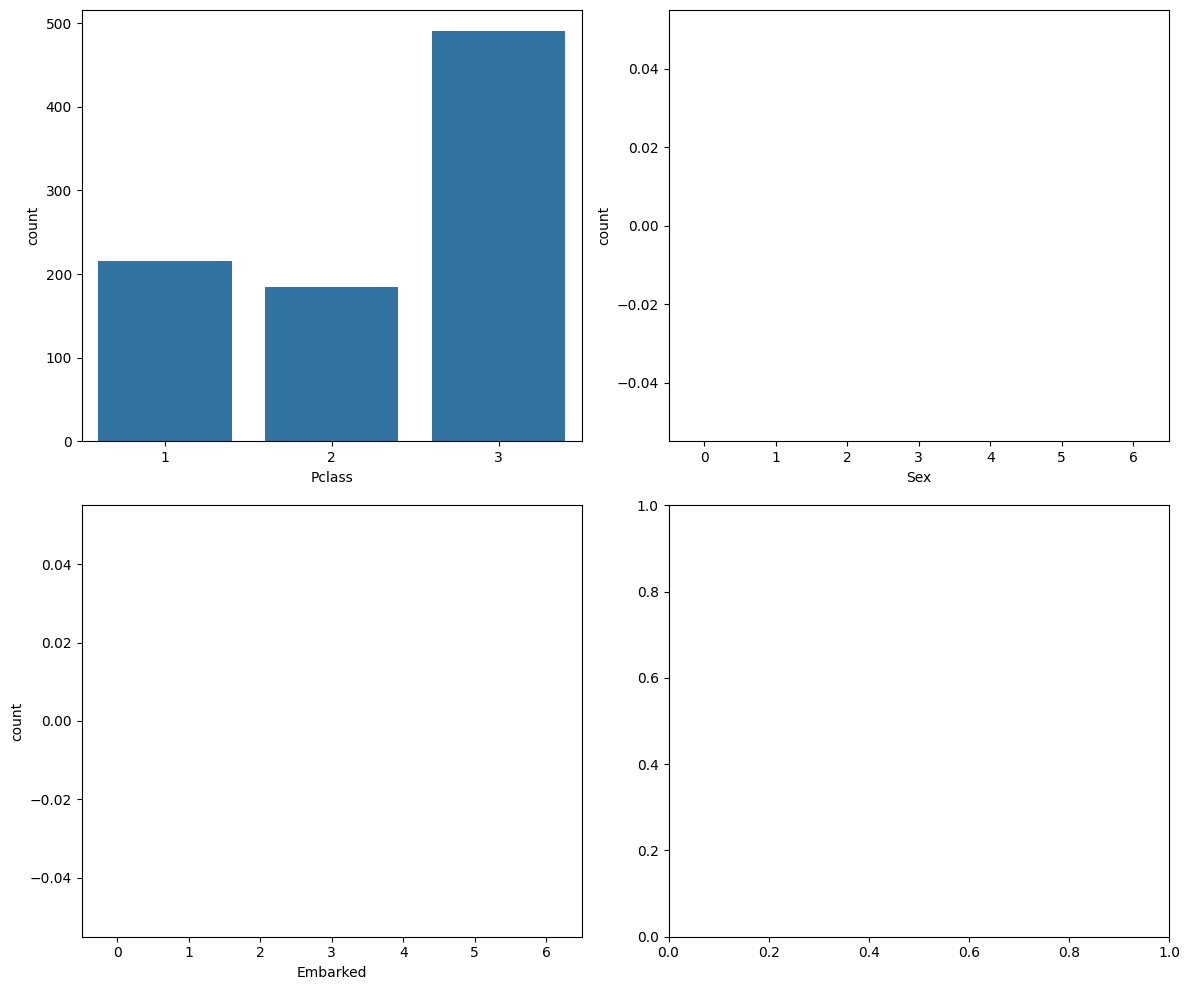

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Виділення категоріальних змінних
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Побудова сітки графіків
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Перебір по кожній категоріальній змінній та побудова графіку
for i, feature in enumerate(categorical_features):
    row = i // 2
    col = i % 2
    sns.countplot(x=feature, data=df, ax=axes[row][col])

plt.tight_layout()
plt.show()


Ваші висновки:

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

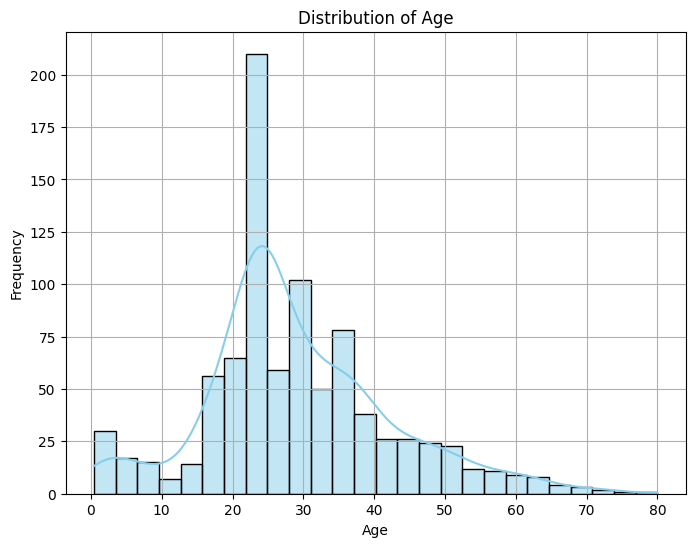

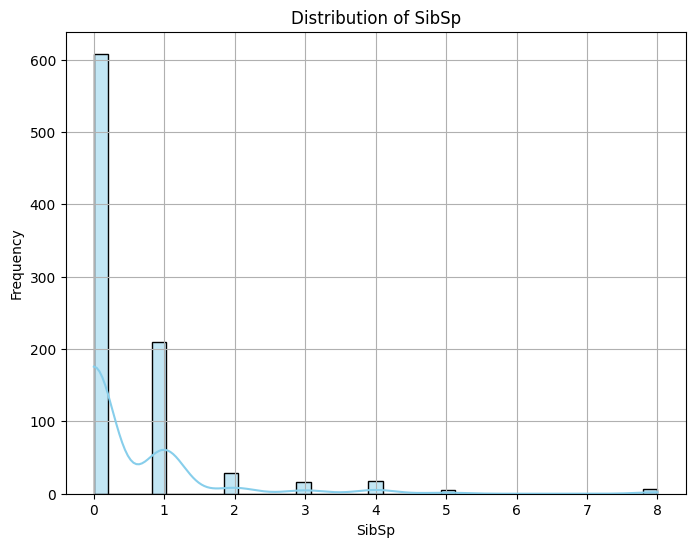

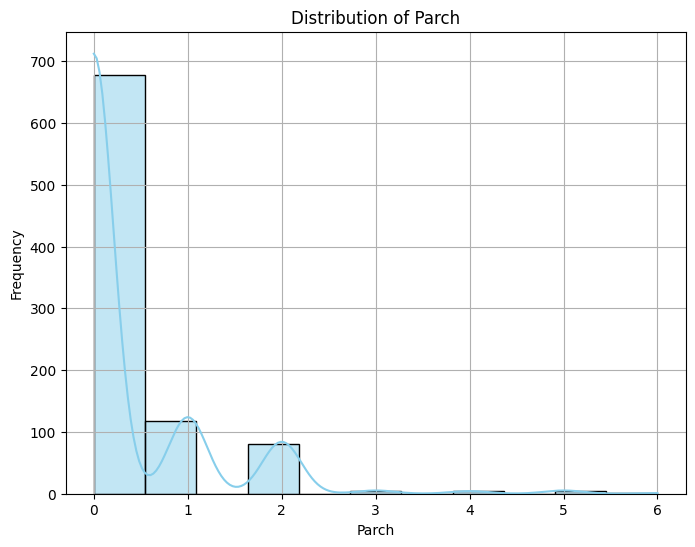

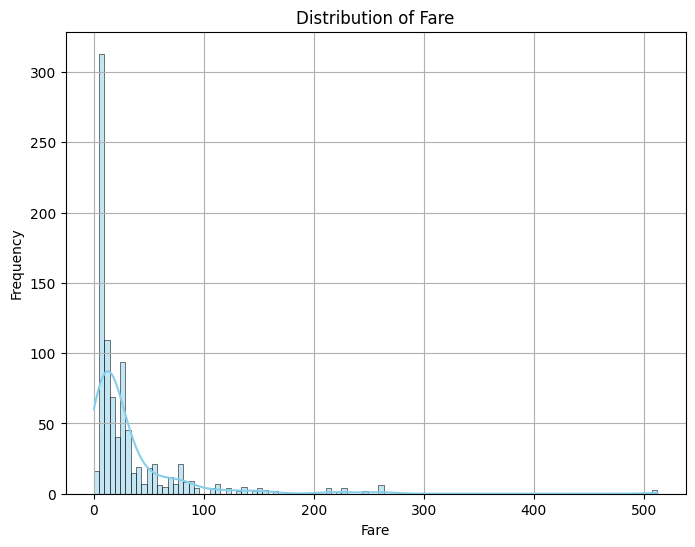

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визначення числових змінних
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Побудова діаграм розподілу для кожної числової змінної
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


Ваші висновки:Вік (Age): Розподіл віку схожий на нормальний розподіл, але є деякі відхилення на більш молодих та старших вікових групах.

Кількість братів/сестер/подружжя (SibSp): Більшість пасажирів подорожували без братів, сестер, чи подружжя, або з одним.

Кількість батьків/дітей (Parch): Більшість пасажирів також подорожували без батьків або дітей. Проте, є значна кількість пасажирів з одним батьком або дитиною.

Вартість квитка (Fare): Розподіл вартості квитків відображає значні відмінності в цінах. Більшість квитків були дешевими, але є кілька значно дорожчих квитків, що виокремлюються на графіку.

Ці висновки допоможуть нам краще зрозуміти характеристики даних та підготувати їх для подальшого аналізу та моделювання.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

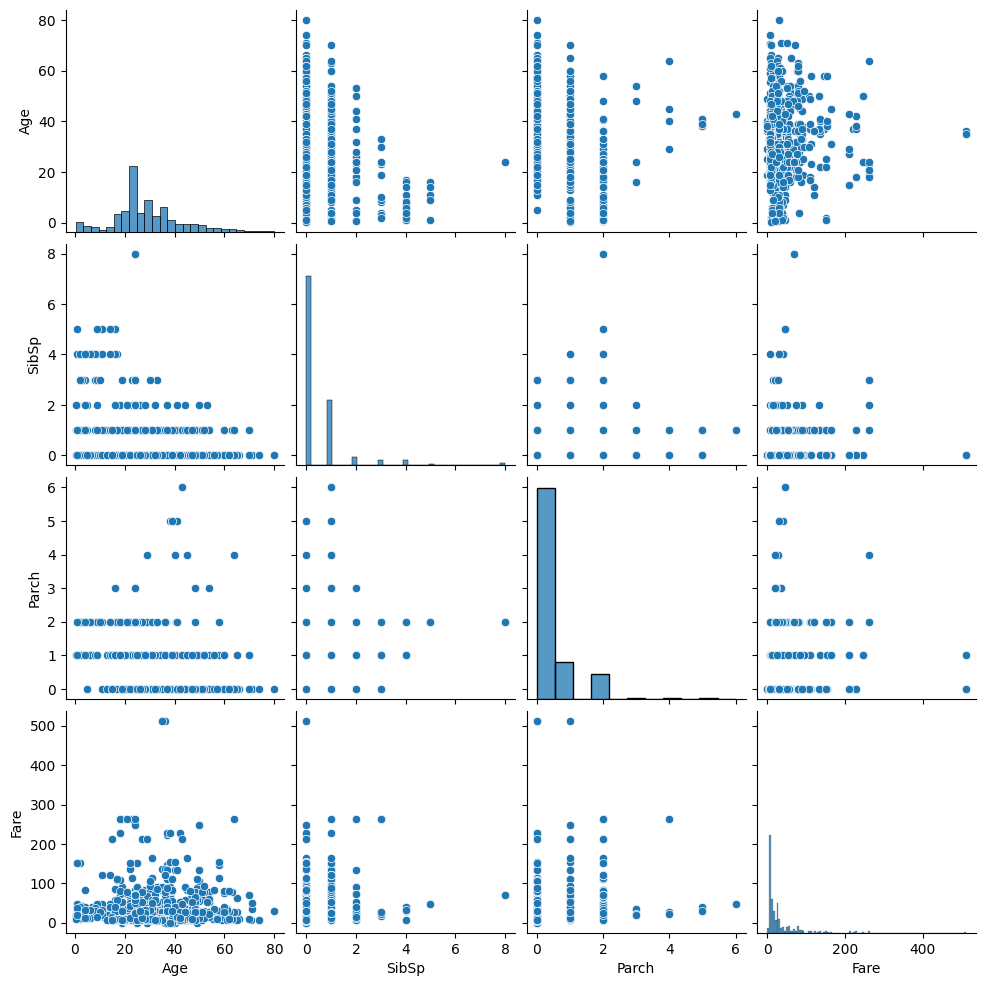

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вибираємо числові змінні для аналізу
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Побудова матриці розсіювання
sns.pairplot(df[numeric_features])
plt.show()


Ваші висновки:Age vs. Fare: На графіку може бути помітна тенденція до того, що вартість квитка зазвичай зростає з віком пасажирів. Це може вказувати на те, що старші пасажири, можливо, обирали більш комфортабельні або класніші місця.

SibSp vs. Parch: Може бути кореляція між кількістю братів/сестер/подружжя та кількістю батьків/дітей на борту. Це може бути пояснено тим, що деякі пасажири подорожують зі своєю родиною або з дітьми, тому кількість братів/сестер/подружжя може корелювати з кількістю батьків/дітей.

Age vs. SibSp: Можливо, буде видно, чи є зв'язок між віком пасажира та кількістю його братів/сестер/подружжя на борту. Наприклад, може бути більше дітей серед молодших пасажирів.

Fare vs. Pclass: Оскільки клас квитка (Pclass) і вартість квитка (Fare) мають тісний зв'язок, можна очікувати, що пасажири вищих класів будуть платити більше за свої квитки.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.